Last value of train at line 160 :
xtrain1 : [3.19191916]
xtrain2 : [6.08222314]
ytrain : [10.40456447]

First value of test at line 161 :
xtest1 : [3.21212118]
xtest2 : [5.94495144]
ytest : [12.3029829]

Thetas:
theta1	[[2.87062041]]
theta2	[[1.4802134]]
theta3	[[1.1611273]]
theta4	[[0.34582412]]
theta5	[[0.64717698]]
theta6	[[0.41678738]]



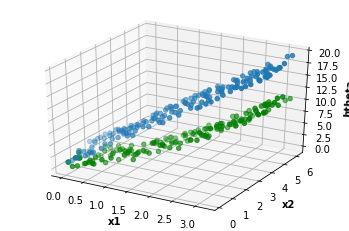

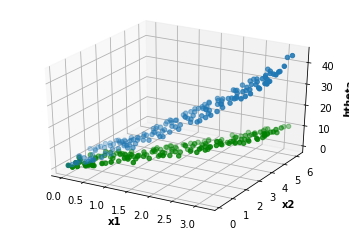

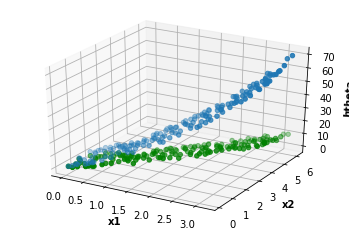

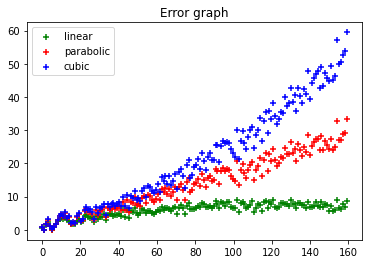

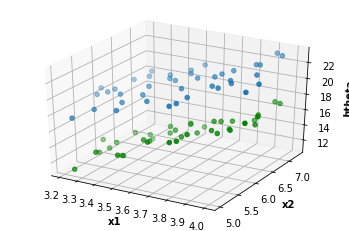

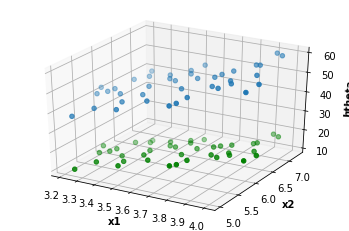

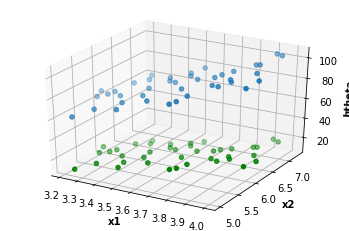

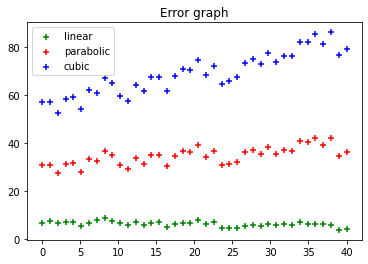

In [4]:
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def display(htheta, x1, x2, y) :
	fig1=plt.figure()
	ax1 = plt.axes(projection="3d")
	ax1.scatter3D(x1, x2, y, color="green")
	ax1.set_xlabel('x1',fontweight='bold')
	ax1.set_ylabel('x2',fontweight='bold')
	ax1.set_zlabel('htheta',fontweight='bold')
	ax1.scatter3D(x1.flatten(), x2.flatten(), htheta.flatten(), 'gray')
	plt.show()

def get_data() :
	df = pd.read_csv("C:/Users/kenny/Desktop/data_lab2_3.txt", sep='\s+')

	line = 159
	X1 = df.iloc[:,0].to_numpy()
	X2 = df.iloc[:,1].to_numpy()
	Y = df.iloc[:,2].to_numpy()

	xtrain1 = np.vstack(np.array(X1[:line]))
	xtrain2 = np.vstack(np.array(X2[:line]))
	ytrain = np.vstack(np.array(Y[:line]))

	xtest1 = np.vstack(np.array(X1[line:]))
	xtest2 = np.vstack(np.array(X2[line:]))
	ytest = np.vstack(np.array(Y[line:]))

	print(f"Last value of train at line {line + 1} :\nxtrain1 : {xtrain1[-1]}\nxtrain2 : {xtrain2[-1]}\nytrain : {ytrain[-1]}\n")
	print(f"First value of test at line {line + 2} :\nxtest1 : {xtest1[0]}\nxtest2 : {xtest2[0]}\nytest : {ytest[0]}\n")

	Xtrain1 = np.array(xtrain1)
	Xtrain2 = np.array(xtrain2)
	Xtrain3 = np.square(Xtrain1)
	Xtrain4 = np.square(Xtrain2)
	Xtrain5 = Xtrain1 * Xtrain2
	Xtrain6 = np.power(Xtrain1, 3)
	Ytrain = np.array(ytrain)

	Xtest1 = np.array(xtest1)
	Xtest2 = np.array(xtest2)
	Xtest3 = np.square(Xtest1)
	Xtest4 = np.square(Xtest2)
	Xtest5 = Xtest1 * Xtest2
	Xtest6 = np.power(Xtest1, 3)
	Ytest = np.array(ytest)

	return df, [Xtrain1, Xtrain2, Xtrain3, Xtrain4, Xtrain5, Xtrain6], Ytrain, xtrain1, xtrain2, ytrain, [Xtest1, Xtest2, Xtest3, Xtest4, Xtest5, Xtest6], Ytest

def linear(theta1, theta2, Xtrain_n, x1, x2, y, disp=0) :
	htheta = 1 + (theta1 * Xtrain_n[0]) + (theta2 * Xtrain_n[1])
	if disp == 1:
		display(htheta, x1, x2, y)
	return htheta

def parabolic(theta1, theta2, theta3, theta4, Xtrain_n, x1, x2, y, disp=0) :
	htheta = 1 + (theta1 * Xtrain_n[0]) + (theta2 * Xtrain_n[1]) + (theta3 * Xtrain_n[2]) + (theta4 * Xtrain_n[3])
	if disp == 1:
		display(htheta, x1, x2, y)
	return htheta

def cubic(theta1, theta2, theta3, theta4, theta5, theta6, Xtrain_n, x1, x2, y, disp=0) :
	htheta = 1 + (theta1 * Xtrain_n[0]) + (theta2 * Xtrain_n[1]) + (theta3 * Xtrain_n[2]) + \
		(theta4 * Xtrain_n[3]) + (theta5 * Xtrain_n[4]) + (theta6 * Xtrain_n[5])
	if disp == 1:
		display(htheta, x1, x2, y)
	return htheta

# def ridge() ;

def error(y, htheta_l, htheta_p, htheta_c, htheta_r) :
	error_l = htheta_l - y
	error_p = htheta_p - y
	error_c = htheta_c - y
	#error_r = htheta_r - y
	fig2 = plt.figure()
	plt.title("Error graph")
	plt.scatter(np.linspace(0, len(y), num=len(y)), error_l, label="linear" ,color="green", marker="+")
	plt.scatter(np.linspace(0, len(y), num=len(y)), error_p, label="parabolic" ,color="red", marker="+")
	plt.scatter(np.linspace(0, len(y), num=len(y)), error_c, label="cubic" ,color="blue", marker="+")
	#plt.scatter(np.linspace(0, len(y), num=len(y)), error_r, label="ridge" ,color="blue", marker="+")
	plt.legend()
	plt.show()


def compute_data(df, Xtrain_n, Ytrain, xtrain1, xtrain2, ytrain) :
	theta1 = np.linalg.inv(Xtrain_n[0].transpose().dot(Xtrain_n[0])).dot(Xtrain_n[0].transpose()).dot(Ytrain)
	theta2 = np.linalg.inv(Xtrain_n[1].transpose().dot(Xtrain_n[1])).dot(Xtrain_n[1].transpose()).dot(Ytrain)
	theta3 = np.linalg.inv(Xtrain_n[2].transpose().dot(Xtrain_n[2])).dot(Xtrain_n[2].transpose()).dot(Ytrain)
	theta4 = np.linalg.inv(Xtrain_n[3].transpose().dot(Xtrain_n[3])).dot(Xtrain_n[3].transpose()).dot(Ytrain)
	theta5 = np.linalg.inv(Xtrain_n[4].transpose().dot(Xtrain_n[4])).dot(Xtrain_n[4].transpose()).dot(Ytrain)
	theta6 = np.linalg.inv(Xtrain_n[5].transpose().dot(Xtrain_n[5])).dot(Xtrain_n[5].transpose()).dot(Ytrain)

	print (f"Thetas:\ntheta1\t{theta1}\ntheta2\t{theta2}\ntheta3\t{theta3}\ntheta4\t{theta4}\ntheta5\t{theta5}\ntheta6\t{theta6}\n")
	return [theta1, theta2, theta3, theta4, theta5, theta6]

if __name__ == "__main__" :
	df, Xtrain_n, Ytrain, xtrain1, xtrain2, ytrain, Xtest_n, Ytest = get_data()
	theta_n = compute_data(df, Xtrain_n, Ytrain, xtrain1, xtrain2, ytrain)

	htheta_l = linear(theta_n[0], theta_n[1], Xtrain_n, Xtrain_n[0], Xtrain_n[1], Ytrain, 1)
	htheta_p = parabolic(theta_n[0], theta_n[1], theta_n[2], theta_n[3], Xtrain_n, Xtrain_n[0], Xtrain_n[1], Ytrain, 1)
	htheta_c = cubic(theta_n[0], theta_n[1], theta_n[2], theta_n[3], theta_n[4], theta_n[5], Xtrain_n, Xtrain_n[0], Xtrain_n[1], Ytrain, 1)
	htheta_r = 0 # ridge()
	error(Ytrain, htheta_l, htheta_p, htheta_c, htheta_r)

	htheta_l = linear(theta_n[0], theta_n[1], Xtest_n, Xtest_n[0], Xtest_n[1], Ytest, 1)
	htheta_p = parabolic(theta_n[0], theta_n[1], theta_n[2], theta_n[3], Xtest_n, Xtest_n[0], Xtest_n[1], Ytest, 1)
	htheta_c = cubic(theta_n[0], theta_n[1], theta_n[2], theta_n[3], theta_n[4], theta_n[5], Xtest_n, Xtest_n[0], Xtest_n[1], Ytest, 1)
	htheta_r = 0 #ridge ()
	error(Ytest, htheta_l, htheta_p, htheta_c, htheta_r)